In [1]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy


from datetime import datetime
from functools import reduce

%matplotlib inline

# Gather

In [2]:
# Load the twitter archive file
tweetsFromFile = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
 # Scrape the image predictions file from the Udacity website
 url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
 response = requests.get(url)
 with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load the image predictions file
imagePredictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
# Setting up the Twitter API with authentication pieces
consumer_key = 'mB67XNimKeHusqjTLayxwOCO5'
consumer_secret = 'isgqtareBItWsFeOXKoCNU06udcy9oSUeYldCwY9CeclmH0que'
access_token = '148370863-PUK5TC2knJOINQiGXWA5VTyrVz1kOfLNFaFm3CTe'
access_secret = 'FoGphjeGqtmCCr2OgHw3Xa2dmRF5TJusO8Tu6JjgfGTpp'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Use Twitter API to collect status data on tweets present in tweetsFromFile dataframe
tweet_ids = list(tweetsFromFile['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True,
                              sleep_on_rate_limit=False)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
770743923962707968


Rate limit reached. Sleeping for: 142


754011816964026368
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383790080
751793661361422336
751598357617971201
751583847268179968
751538714308972544
751456908746354688
751251247299190784
751205363882532864
751132876104687617
750868782890057730
750719632563142656
750506206503038976
750429297815552001
750383411068534784
750381685133418496
750147208377409536
750132105863102464
750117059602808832
750101899009982464
750086836815486976
750071704093859840
750056684286914561
750041628174217216
750026558547456000
750011400160841729
749996283729883136
749981277374128128
749774190421639168
749417653287129088
749403093750648834
749395845976588288
749317047558017024
749075273010

695767669421768709
695629776980148225
695446424020918272
695409464418041856
695314793360662529
695095422348574720
695074328191332352
695064344191721472
695051054296211456
694925794720792577
694905863685980160
694669722378485760
694356675654983680
694352839993344000
694342028726001664
694329668942569472
694206574471057408
694183373896572928
694001791655137281
693993230313091072
693942351086120961
693647888581312512
693644216740769793
693642232151285760
693629975228977152
693622659251335168
693590843962331137
693582294167244802
693486665285931008
693280720173801472
693267061318012928
693262851218264065
693231807727280129
693155686491000832
693109034023534592
693095443459342336
692919143163629568
692905862751522816
692901601640583168
692894228850999298
692828166163931137
692752401762250755
692568918515392513
692535307825213440
692530551048294401
692423280028966913
692417313023332352
692187005137076224
692158366030913536
692142790915014657
692041934689402880
692017291282812928
691820333922

673240798075449344
673213039743795200
673148804208660480
672997845381865473
672995267319328768
672988786805112832
672984142909456390
672980819271634944
672975131468300288
672970152493887488
672968025906282496
672964561327235073
672902681409806336
672898206762672129
672884426393653248
672877615439593473
672834301050937345
672828477930868736
672640509974827008
672622327801233409
672614745925664768
672609152938721280
672604026190569472
672594978741354496
672591762242805761
672591271085670400
672538107540070400
672523490734551040
672488522314567680
672482722825261057
672481316919734272
672475084225949696
672466075045466113
672272411274932228
672267570918129665
672264251789176834
672256522047614977
672254177670729728
672248013293752320
672245253877968896
672239279297454080
672231046314901505
672222792075620352
672205392827572224
672169685991993344
672160042234327040
672139350159835138
672125275208069120
672095186491711488
672082170312290304
672068090318987265
671896809300709376
671891728106

In [7]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [8]:
# Load the Twitter API data
verifiedTweets = pd.read_json('tweet_json.txt')
verifiedTweets['tweet_id'] = tweet_id_success
verifiedTweets = verifiedTweets[['tweet_id', 'favorite_count', 'retweet_count']]

# Assess

In [9]:
tweetsFromFile.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\r\n*wiggle*\r\n*wiggle*\r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo,None,None,None


In [10]:
tweetsFromFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
tweetsFromFile['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
tweetsFromFile['text'].value_counts()

This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you                                                               1
We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ                 1
RT @dog_rates: Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 12/10 https://t.c…                                  1
RT @dog_rates: This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/…                                  1
Say hello to Opie and Clarkus. Clarkus fell asleep so Opie buried him. Ruthless af 10/10 for both https://t.co/xT7XaY4gnW                                                     1
Here's a doggo doin a struggle. 11/10 much determined https://t.co/gQqRBfkX4I                                           

In [13]:
tweetsFromFile['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1    2
https://twitter.com/dog_rates/status/820749716845686786/photo/1,https://twitter.com/dog_rates/status/820749716845686786/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/759447681597108224/photo/1                                                                                                                                                          

In [14]:
tweetsFromFile['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Daisy        7
an           7
Buddy        7
Toby         7
Bailey       7
Jax          6
Scout        6
Koda         6
Bella        6
Leo          6
Stanley      6
Dave         6
Rusty        6
Jack         6
Oscar        6
Milo         6
Gus          5
          ... 
Keet         1
Pepper       1
Skye         1
Darby        1
Nico         1
Georgie      1
Kallie       1
Miguel       1
Ziva         1
Jay          1
Ivar         1
Laika        1
Tilly        1
Aja          1
Lipton       1
Banditt      1
Robin        1
Callie       1
Sonny        1
Henry        1
Rueben       1
Brandy       1
Dallas       1
Chase        1
Lance        1
Dale         1
Bilbo        1
Fido         1
Rose         1
Puff         1
Name: name, Length: 957, dtype: int64

In [15]:
tweetsFromFile['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [16]:
verifiedTweets['retweet_count'].value_counts()

1492     3
3493     3
1785     3
2000     3
4296     3
2417     3
2094     3
7885     2
6365     2
1223     2
9582     2
3309     2
3030     2
6351     2
4304     2
5817     2
4499     2
2300     2
1238     2
10223    2
8418     2
5859     2
5854     2
2032     2
8388     2
29890    2
6971     2
3956     2
1713     2
3502     2
        ..
3684     1
3683     1
2028     1
3679     1
3678     1
3675     1
881      1
1107     1
2682     1
2370     1
157      1
2714     1
5784     1
3244     1
6805     1
3732     1
2492     1
2705     1
2704     1
2884     1
1661     1
6795     1
650      1
4745     1
4309     1
23171    1
2262     1
3712     1
7807     1
29178    1
Name: retweet_count, Length: 788, dtype: int64

In [17]:
verifiedTweets.sample(5)

,tweet_id,favorite_count,retweet_count
733,778990705243029504,20660,7489
786,772102971039580160,4114,961
711,781955203444699136,11498,3493
253,842115215311396866,14151,3065
769,773985732834758656,11050,4008


In [18]:
verifiedTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 3 columns):
tweet_id          912 non-null int64
favorite_count    912 non-null int64
retweet_count     912 non-null int64
dtypes: int64(3)
memory usage: 21.5 KB


In [19]:
imagePredictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
959,705591895322394625,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1,basenji,0.877207,True,Italian_greyhound,0.047854,True,miniature_pinscher,0.035638,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
485,675489971617296384,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True


In [20]:
imagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
imagePredictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                       

In [22]:
imagePredictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
imagePredictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [24]:
imagePredictions['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [25]:
imagePredictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
imagePredictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [27]:
imagePredictions['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [28]:
imagePredictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [29]:
imagePredictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [30]:
imagePredictions['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [31]:
imagePredictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Quality Issues (not all issues will be cleaned)

* Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
* tweet_id is an integer
* timestamp and retweeted_status_timestamp are currently of type 'object'
* source is in HTML format with a and \a tags surrounding the text
* name has values that are the string "None" instead of NaN
* Some names are inaccurate such as "a", "an", "the", "very", "by", etc.
* doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
* There are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).
* There are many columns in this dataframe making it hard to read, and some will not be needed for analysis


* There are 11 missing tweets compared to the tweetsFromFile dataframe,


* There are 2356 tweets in the tweetsFromFile dataframe and 2075 rows in the imagePredictions dataframe.  This could mean that there is missing data, or that not all 2356 of the tweets had pictures. 
* tweet_id is an integer
* p1, p2, and p3 contain underscores instead of spaces in the labels


### Tidiness Issues

* tweetsFromFile dataframe contains doggo, floofer, pupper, and puppo are redundant
* imagePredictions and verifiedTweets data should be combined with the tweetsFromFile data since they are information about the same tweet


# Clean

In [32]:
# Make copies of the dataframes for cleaning

copy_of_tweetsFromFile = tweetsFromFile.copy()
copy_of_verifiedTweets = verifiedTweets.copy()
copy_of_imagePredictions = imagePredictions.copy()

## Merging all dataframes
verifiedTweets and imagePredictions data should be combined with the tweetsFromFile data since they are information about the same tweet.

In [33]:
# Merge the tweetsFromFile, verifiedTweets, and imagePredictions dataframes on 'tweet_id'
dfs = [copy_of_tweetsFromFile, copy_of_verifiedTweets, copy_of_imagePredictions]
tweet_Data = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

### Verify
Verifying if all the columns have been merged

In [34]:
# View first few lines of new twitter dataframe to ensure the columns have merged
tweet_Data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [35]:
# View info of new twitter dataframe to ensure the columns have merged
tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 30 columns):
tweet_id                      754 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     754 non-null object
source                        754 non-null object
text                          754 non-null object
retweeted_status_id           70 non-null float64
retweeted_status_user_id      70 non-null float64
retweeted_status_timestamp    70 non-null object
expanded_urls                 754 non-null object
rating_numerator              754 non-null int64
rating_denominator            754 non-null int64
name                          754 non-null object
doggo                         754 non-null object
floofer                       754 non-null object
pupper                        754 non-null object
puppo                         754 non-null object
favorite_count                754 non-null int64
re

## One column for dog stages
We have a variable (dog stage) is in all 4 different columns (doggo, floofer, pupper, and puppo)
So extracting the dog stages from the 'text' column into the new 'dog_stage' column and then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.  
Also removing name with string "None" instead of "NaN".  

In [36]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
tweet_Data['dog_stage'] = tweet_Data['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [37]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
tweet_Data[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [38]:
# Drop doggo, floofer, pupper, and puppo columns
tweet_Data = tweet_Data.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Verify
Checking if the data has been properly edited

In [39]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 27 columns):
tweet_id                      754 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     754 non-null object
source                        754 non-null object
text                          754 non-null object
retweeted_status_id           70 non-null float64
retweeted_status_user_id      70 non-null float64
retweeted_status_timestamp    70 non-null object
expanded_urls                 754 non-null object
rating_numerator              754 non-null int64
rating_denominator            754 non-null int64
name                          754 non-null object
favorite_count                754 non-null int64
retweet_count                 754 non-null int64
jpg_url                       754 non-null object
img_num                       754 non-null int64
p1                            754 non-null object
p1_c

## Removing retweets

Will remove retweets such that rows where 'retweeted_status_id' is a NaN will be kept and then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.  

In [40]:
# Keep columns where 'retweeted_status_id' is NaN
tweet_Data = tweet_Data[np.isnan(tweet_Data.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(tweet_Data.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
tweet_Data = tweet_Data.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 753
Data columns (total 27 columns):
tweet_id                      684 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     684 non-null object
source                        684 non-null object
text                          684 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 684 non-null object
rating_numerator              684 non-null int64
rating_denominator            684 non-null int64
name                          684 non-null object
favorite_count                684 non-null int64
retweet_count                 684 non-null int64
jpg_url                       684 non-null object
img_num                       684 non-null int64
p1                            684 non-null object
p1_conf

### Verify

In [41]:
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 753
Data columns (total 24 columns):
tweet_id                 684 non-null int64
in_reply_to_status_id    4 non-null float64
in_reply_to_user_id      4 non-null float64
timestamp                684 non-null object
source                   684 non-null object
text                     684 non-null object
expanded_urls            684 non-null object
rating_numerator         684 non-null int64
rating_denominator       684 non-null int64
name                     684 non-null object
favorite_count           684 non-null int64
retweet_count            684 non-null int64
jpg_url                  684 non-null object
img_num                  684 non-null int64
p1                       684 non-null object
p1_conf                  684 non-null float64
p1_dog                   684 non-null bool
p2                       684 non-null object
p2_conf                  684 non-null float64
p2_dog                   684 non-null bool
p3   


## Removing Quality issue 

Changing tweet_id to a string/object.
<br>Convert 'timestamp' to a datetime object.
<br>Replace all inaccurate names with NaNs, and the "O" with "O'Malley".
<br>Create a new column "rating" by calculating divided by the denominator so that we can get a proper assumption on ratings
<br>Drop undesired columns and change table display settings.

In [42]:
# Change 'tweet_id' to a string
tweet_Data['tweet_id'] = tweet_Data['tweet_id'].astype(str)

In [43]:
# Remove the time zone information from 'timestamp' column
tweet_Data['timestamp'] = tweet_Data['timestamp'].str.slice(start=0, stop=-6)

In [44]:
# Change the 'timestamp' column to a datetime object
tweet_Data['timestamp'] = pd.to_datetime(tweet_Data['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [45]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in tweet_Data['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my']


In [46]:
# Replace all names that start with a lowercase letter with a NaN
tweet_Data['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
tweet_Data['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
tweet_Data['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [47]:
# Calulate the value of 'rating'
tweet_Data['rating'] = tweet_Data['rating_numerator'] / tweet_Data['rating_denominator']

In [48]:
# View all column names
tweet_Data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'rating'],
      dtype='object')

In [49]:
# Change some column names so they are shorter
tweet_Data.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
tweet_Data.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None) 

### Verify

In [50]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
tweet_Data['name'].value_counts()

# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
tweet_Data.head()



,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,36813,7848,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31692,5812,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23879,3846,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,40137,8004,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,38336,8659,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,1.2


# Storing Dataframe

In [51]:
# Save twitter dataframe to a CSV file
tweet_Data.to_csv('twitter_archive_master.csv')

# Anayze and Visualize

C:\Users\ma501v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


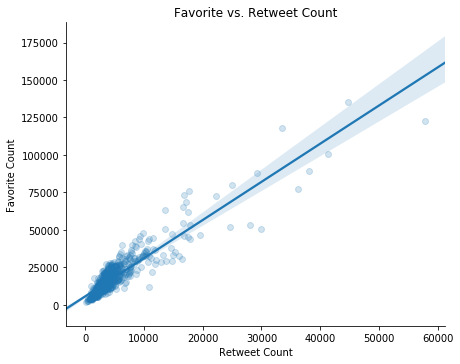

In [53]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=tweet_Data,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

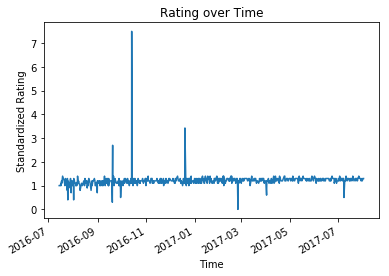

In [54]:
# Plot standardized ratings over time
tweet_Data.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases.  Before 2016-11 there many ratings below 1, while after that time there are barely any.

Creating new column for most rated dog type so that we can get and insight into that data

In [58]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(tweet_Data):
    if tweet_Data['p1_dog'] == True:
        dog_type.append(tweet_Data['p1'])
        confidence_list.append(tweet_Data['p1_conf'])
    elif tweet_Data['p2_dog'] == True:
        dog_type.append(tweet_Data['p2'])
        confidence_list.append(tweet_Data['p2_conf'])
    elif tweet_Data['p3_dog'] == True:
        dog_type.append(tweet_Data['p3'])
        confidence_list.append(tweet_Data['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
tweet_Data.apply(image, axis=1)

#create new columns
tweet_Data['dog_type'] = dog_type
tweet_Data['confidence_list'] = confidence_list

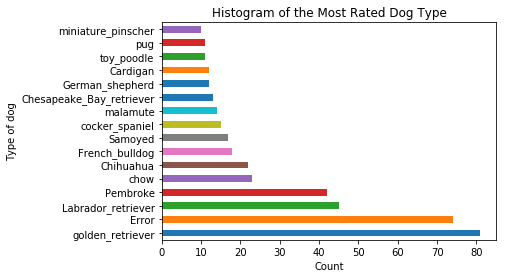

In [60]:
df_dog_type = tweet_Data.groupby('dog_type').filter(lambda x: len(x) >= 10)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [62]:
tweet_Data_mean = tweet_Data.groupby('dog_type').mean()

In [64]:
tweet_Data_mean.head()

,numerator,denominator,favorite_count,retweet_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating
dog_type,,,,,,,,,,,
Afghan_hound,9.666667,10.0,16047.666667,5330.000000,0.433959,1.000000,0.099034,1.0,0.081651,0.666667,0.966667
Airedale,11.250000,10.0,10915.750000,2411.500000,0.584666,1.000000,0.186062,1.0,0.088151,1.000000,1.125000
American_Staffordshire_terrier,10.142857,10.0,13206.571429,2463.714286,0.633585,0.714286,0.120411,1.0,0.054049,0.857143,1.014286
Appenzeller,13.000000,10.0,11242.000000,1900.000000,0.341703,1.000000,0.199287,1.0,0.193548,0.000000,1.300000
Australian_terrier,13.000000,10.0,18635.000000,4938.000000,0.207281,1.000000,0.156296,1.0,0.123536,1.000000,1.300000
